In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# Scipy:
    
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1. fitting it to the periodic function
2. plot the fit

Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Temperature in Celcius')

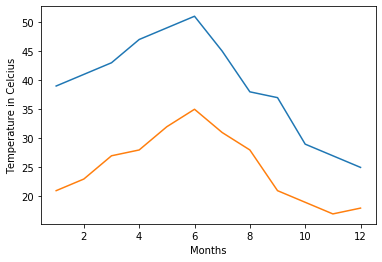

In [3]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

plt.plot(np.arange(1,13), Max)
plt.plot(np.arange(1,13), Min)

plt.xlabel('Months')
plt.ylabel('Temperature in Celcius')

In [4]:
# Fitting it to a periodic function

from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

In [5]:
res_max, cov_max = optimize.curve_fit(yearly_temps, np.arange(1,13), Max, [20, 10, 0])

res_min, cov_min = optimize.curve_fit(yearly_temps, np.arange(1,13), Min, [-40, 20, 0])

In [6]:
days = np.linspace(0, 12, num=365)
days

array([ 0.        ,  0.03296703,  0.06593407,  0.0989011 ,  0.13186813,
        0.16483516,  0.1978022 ,  0.23076923,  0.26373626,  0.2967033 ,
        0.32967033,  0.36263736,  0.3956044 ,  0.42857143,  0.46153846,
        0.49450549,  0.52747253,  0.56043956,  0.59340659,  0.62637363,
        0.65934066,  0.69230769,  0.72527473,  0.75824176,  0.79120879,
        0.82417582,  0.85714286,  0.89010989,  0.92307692,  0.95604396,
        0.98901099,  1.02197802,  1.05494505,  1.08791209,  1.12087912,
        1.15384615,  1.18681319,  1.21978022,  1.25274725,  1.28571429,
        1.31868132,  1.35164835,  1.38461538,  1.41758242,  1.45054945,
        1.48351648,  1.51648352,  1.54945055,  1.58241758,  1.61538462,
        1.64835165,  1.68131868,  1.71428571,  1.74725275,  1.78021978,
        1.81318681,  1.84615385,  1.87912088,  1.91208791,  1.94505495,
        1.97802198,  2.01098901,  2.04395604,  2.07692308,  2.10989011,
        2.14285714,  2.17582418,  2.20879121,  2.24175824,  2.27

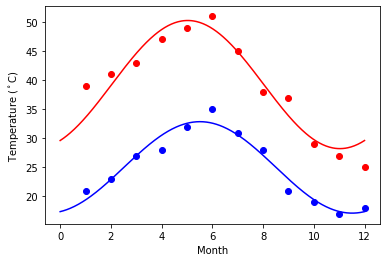

In [13]:
# Plotting the fit
plt.figure()

plt.plot(np.arange(1,13), Max, 'ro')

plt.plot(days, yearly_temps(days, *res_max), 'r-')

plt.plot(np.arange(1,13), Min, 'bo')

plt.plot(days, yearly_temps(days, *res_min), 'b-')

plt.xlabel('Month')

plt.ylabel('Temperature ($^\circ$C)')

plt.show()


# Matplotlib

This assignment is for visualization using matplotlib:
    
data to use:
    
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

In [9]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
    
titanic = pd.read_csv(url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


# Create a pie chart presenting the male/female proportion

In [30]:
titanic['sex'].head()

0    female
1      male
2    female
3      male
4    female
Name: sex, dtype: object

In [38]:
titanic['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

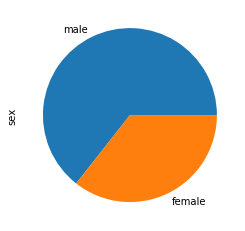

In [33]:
titanic['sex'].value_counts().plot(kind='pie')

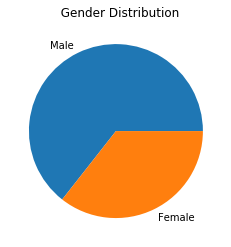

In [13]:
plt.pie(titanic['sex'].value_counts(),labels=['Male','Female'])
plt.title("  Gender Distribution")
plt.show()

# Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

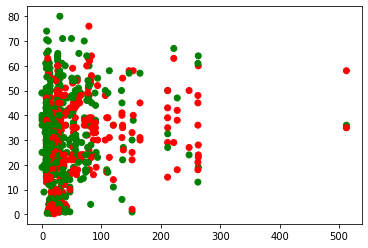

In [55]:
gender = np.array(titanic['sex'].apply(lambda x : 1 if x=='male' else 0))

colormap = np.array(['r', 'g'])

plt.scatter(titanic['fare'], titanic['age'], c=colormap[gender])

